# Navigation

---

In this notebook, We will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md), [NumPy](http://www.numpy.org/) [pandas](https://pandas.pydata.org/), [pytorch](https://pytorch.org) and [matplotlib](https://matplotlib.org/).

In [1]:
from dqn_agent import Agent
from unityagents import UnityEnvironment
import numpy as np
import random
import sys
import os
import pandas as pd
import torch
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

#### Load the environment

In [2]:
env = UnityEnvironment(file_name="C:\\Users\\Admin\\Downloads\\Banana_Windows_x86_64\\Banana_Windows_x86_64\\Banana.exe")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [ 1.          0.          0.          0.          0.84408134  0.          0.
  1.          0.          0.0748472   0.          1.          0.          0.
  0.25755     1.          0.          0.          0.          0.74177343
  0.          1.          0.          0.          0.25854847  0.          0.
  1.          0.          0.09355672  0.          1.          0.          0.
  0.31969345  0.          0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Scores: {}".format(score))

Scores: 1.0


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

#### Train the Agent with DQN

We have used Deep Q-network (DQN) to train our agent.

Following is Q-Learning update.

<img src="q_learning_update.png">

As state space is infinitely large (because elenemts in state space can take real numbers), tabular form of storing Q-values (Q(s, a)) for state-action pairs is not possible. In this scenario Deep Q-network is usefull. 

##### What is Deep Q-network (DQN)?

This is a neural net which give Q-value for all possible actions for given state input. In next cell, I have shown network architecture of Q-network which is being used. Network architecture is defined in "model.py" (code are commented properly).

##### How agent is using this architecture in learning?

Code for agent is in "dqn_agent.py" (each block of codes are commented). Brief of how agent is learning is as follows:

- There is two Q-networks, one is target network and other is local network. At each step local network is being inferred to get Q-values for state-action pair, Q(s, a). Target network is being inferred to get Q-values for next state, Q(s+1, a_i) where a_i is all possible state in a_i. Rewards for action a, and max Q-value from next state, max_i(Q(s+1, a_i)) are used as shown is equation to set target for local network Q-value for state-action pair. Difference in local and target value is used to back propagate and upate parameter in loacal Q-network. Periodically target network is updated with weighted fraction of local network parameters and target network parameters.  
- Instead of learning with current experience, we are storing experience is a memory buffer. For learning sampling uniformally at random for given batch size from memory buffer. It helps in using past experience and batch helps in fast and smooth learning. 
- Have used Adam optimizer to update local network parameters.

##### Hyperparameters

Following hyperparameters are used:

- BUFFER_SIZE = int(1e5)            # replay buffer size, 
- BATCH_SIZE = 64                   # minibatch size
- GAMMA = 0.99                      # discount factor
- TAU = 1e-3                        # for soft update of target parameters
- LR = 5e-4                         # learning rate 
- UPDATE_EVERY = 4                  # how often to update the network


In [6]:
from torchsummary import summary
from model import QNetwork

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
qnetwork = QNetwork(state_size=state_size, action_size=action_size, seed=0).to(device)
summary(qnetwork, input_size=(state_size,))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 256]           9,728
            Linear-2                  [-1, 128]          32,896
            Linear-3                    [-1, 4]             516
Total params: 43,140
Trainable params: 43,140
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.16
Estimated Total Size (MB): 0.17
----------------------------------------------------------------


### Plot of rewards function

This function will plot reward for each episode and rolling average of 100 episodes.

In [7]:
def plot_scores(scores, rolling_window=100):
    """Plot scores and optional rolling mean using specified window."""
    plt.plot(scores, label='Score') 
    plt.title("Learning Curve")
    plt.ylabel('Score')
    plt.xlabel('Episode #')
    rolling_mean = pd.Series(scores).rolling(rolling_window).mean()
    plt.plot(rolling_mean, label='Rolling_Avg_{}_Score'.format(rolling_window))
    plt.legend(loc='upper left')
    return

### Learn DQN agent function

This is the main function which create agent which intracts with environmnt and learn.

In [8]:
def dqn(n_episodes=2000, max_t=1000, eps_start=1.0, eps_end=0.01, eps_decay=0.995, 
        scores_win=100, model_name='model.pth', target_score=13.0):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int): maximum number of training episodes
        max_t (int): maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    agent = Agent(state_size=state_size, action_size=action_size, seed=0)
    # load pre-trained weight if it exist already. Start training further
    if os.path.exists(model_name):
        agent.qnetwork_local.load_state_dict(torch.load(model_name))
    scores = []                               # list containing scores from each episode
    scores_window = deque(maxlen=scores_win)  # last 100 scores
    eps = eps_start                           # initialize epsilon
    max_score = -sys.maxsize
    for i_episode in range(1, n_episodes+1):
        env_info = env.reset(train_mode=True)[brain_name]
        state = env_info.vector_observations[0]
        score = 0
        for t in range(max_t):
            action = agent.act(state, eps)
            env_info = env.step(int(action))[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]        # get the next state
            reward = env_info.rewards[0]                        # get the reward
            done = env_info.local_done[0]
            agent.step(state, action, reward, next_state, done)
            state = next_state
            score += reward
            if done:
                break 
        scores_window.append(score)       # save most recent score
        scores.append(score)              # save most recent score
        eps = max(eps_end, eps_decay*eps) # decrease epsilon
        print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)), end="")
        if i_episode % scores_win == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_window)))
            # If agent improved then save its weight
            if np.mean(scores_window) > max_score:
                max_score = np.mean(scores_window)
                torch.save(agent.qnetwork_local.state_dict(), model_name)
            
        if np.mean(scores_window)>=target_score:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), model_name)
            break
    return scores


### Learning and Scores Plot

In next block of code, dqn is called which is responsible of learning and scores and rolling average scores of 100 episodes is ploted using plot_score function.

We have set target scores of 16, which has been achived in 1156 episodes.

Episode 100	Average Score: 0.26
Episode 200	Average Score: 1.73
Episode 300	Average Score: 6.73
Episode 400	Average Score: 9.65
Episode 500	Average Score: 12.44
Episode 600	Average Score: 14.02
Episode 700	Average Score: 14.96
Episode 800	Average Score: 13.90
Episode 900	Average Score: 15.28
Episode 1000	Average Score: 14.93
Episode 1100	Average Score: 15.16
Episode 1156	Average Score: 16.01
Environment solved in 1056 episodes!	Average Score: 16.01


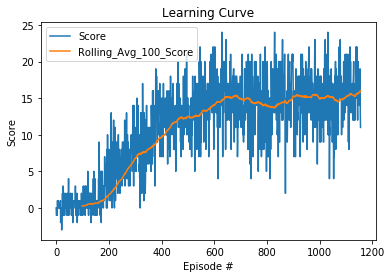

In [9]:
scores = dqn(eps_start=1.0, target_score=16.0)
plot_scores(scores)

### 6. Watch a Smart Agent!

In the next code cell, you will load the trained weights from file to watch a smart agent!

In [25]:
# load the weights from file
model_name = 'model.pth'
agent = Agent(state_size=state_size, action_size=action_size, seed=0)
agent.qnetwork_local.load_state_dict(torch.load(model_name))

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
while True:
    action = agent.act(state)                      # select an action
    env_info = env.step(int(action))[brain_name]   # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Scores: {}".format(score))

Scores: 17.0


### Close the environment.

In [26]:
env.close()

### Future ideas to improve agent's performance

- Instead of using Q-learning, we can try other diffrent Reinforcement Learning algorithm e.g. double Q-learning, actor-critic.
- We can play more arround hyperparameters.
- We can try using different Q-network model e.g more complex or less complex.